In [1]:
import os
os.chdir("/gpfs/home/asun/jin_lab/get/GEARS/demo/")
print(os.getcwd())
import sys
sys.path.append(os.path.abspath('..'))

from gears import PertData, GEARS

/gpfs/group/jin/asun/get/GEARS/demo


/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/anndata/utils.py:434: Futur

In [1]:
import torch
print(torch.cuda.device_count())

1


Load data. We use norman as an example.

In [2]:
pert_data = PertData('./data') # specific saved folder
pert_data.load(data_path = './data/zheng') # load the processed data, the path is saved folder + dataset_name
pert_data.prepare_split(split = 'simulation_single', seed = 1) # get data split with seed
pert_data.get_dataloader(batch_size = 32, test_batch_size = 128) # prepare data loader

Found local copy...
Found local copy...
These perturbations are not in the GO graph and their perturbation can thus not be predicted
[]
Local copy of pyg dataset is detected. Loading...
Done!
Local copy of split is detected. Loading...
Done!
Creating dataloaders....
Done!


here1


Create a model object; if you use [wandb](https://wandb.ai), you can easily track model training and evaluation by setting `weight_bias_track` to true, and specify the `proj_name` and `exp_name` that you like.

In [4]:
gears_model = GEARS(pert_data, device = 'cuda:0', 
                        weight_bias_track = True, 
                        proj_name = 'gears', 
                        exp_name = 'zheng')
gears_model.model_initialize(hidden_size = 64)

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


Found local copy...


You can find available tunable parameters in model_initialize via

In [7]:
gears_model.tunable_parameters()

{'hidden_size': 'hidden dimension, default 64',
 'num_go_gnn_layers': 'number of GNN layers for GO graph, default 1',
 'num_gene_gnn_layers': 'number of GNN layers for co-expression gene graph, default 1',
 'decoder_hidden_size': 'hidden dimension for gene-specific decoder, default 16',
 'num_similar_genes_go_graph': 'number of maximum similar K genes in the GO graph, default 20',
 'num_similar_genes_co_express_graph': 'number of maximum similar K genes in the co expression graph, default 20',
 'coexpress_threshold': 'pearson correlation threshold when constructing coexpression graph, default 0.4',
 'uncertainty': 'whether or not to turn on uncertainty mode, default False',
 'uncertainty_reg': 'regularization term to balance uncertainty loss and prediction loss, default 1',
 'direction_lambda': 'regularization term to balance direction loss and prediction loss, default 1'}

Train your model:

Note: For the sake of demo, we set epoch size to 1. To get full model, set `epochs = 20`.

In [5]:
gears_model.train(epochs = 20, lr = 1e-3)

Start Training...
Epoch 1 Step 1 Train Loss: 0.5444
Epoch 1 Step 51 Train Loss: 0.4853
Epoch 1 Step 101 Train Loss: 0.6020
Epoch 1 Step 151 Train Loss: 0.6286
Epoch 1 Step 201 Train Loss: 0.4956
Epoch 1: Train Overall MSE: 0.0033 Validation Overall MSE: 0.0032. 
Train Top 20 DE MSE: 0.0754 Validation Top 20 DE MSE: 0.0477. 
Epoch 2 Step 1 Train Loss: 0.6943
Epoch 2 Step 51 Train Loss: 0.6782
Epoch 2 Step 101 Train Loss: 0.6096
Epoch 2 Step 151 Train Loss: 0.6134
Epoch 2 Step 201 Train Loss: 0.5461
Epoch 2: Train Overall MSE: 0.0030 Validation Overall MSE: 0.0013. 
Train Top 20 DE MSE: 0.0085 Validation Top 20 DE MSE: 0.0315. 
Epoch 3 Step 1 Train Loss: 0.4633
Epoch 3 Step 51 Train Loss: 0.5125
Epoch 3 Step 101 Train Loss: 0.5653
Epoch 3 Step 151 Train Loss: 0.5497
Epoch 3 Step 201 Train Loss: 0.6145
Epoch 3: Train Overall MSE: 0.0012 Validation Overall MSE: 0.0013. 
Train Top 20 DE MSE: 0.0076 Validation Top 20 DE MSE: 0.0400. 
Epoch 4 Step 1 Train Loss: 0.6210
Epoch 4 Step 51 Train Lo

Epoch 1 Step 1 Train Loss: 0.5626
Epoch 1 Step 51 Train Loss: 0.4361
Epoch 1 Step 101 Train Loss: 0.4368
Epoch 1 Step 151 Train Loss: 0.4140
Epoch 1 Step 201 Train Loss: 0.4180
Epoch 1 Step 251 Train Loss: 0.4792
Epoch 1 Step 301 Train Loss: 0.5223
Epoch 1 Step 351 Train Loss: 0.4383
Epoch 1 Step 401 Train Loss: 0.4672
Epoch 1 Step 451 Train Loss: 0.5511
Epoch 1 Step 501 Train Loss: 0.4343
Epoch 1 Step 551 Train Loss: 0.5042
Epoch 1 Step 601 Train Loss: 0.5136
Epoch 1 Step 651 Train Loss: 0.4401
Epoch 1 Step 701 Train Loss: 0.5244
Epoch 1 Step 751 Train Loss: 0.4747
Epoch 1 Step 801 Train Loss: 0.4465
Epoch 1 Step 851 Train Loss: 0.4545
Epoch 1 Step 901 Train Loss: 0.5126
Epoch 1 Step 951 Train Loss: 0.5011
Epoch 1 Step 1001 Train Loss: 0.4591
Epoch 1 Step 1051 Train Loss: 0.4627
Epoch 1 Step 1101 Train Loss: 0.6890
Epoch 1 Step 1151 Train Loss: 0.4552
Epoch 1 Step 1201 Train Loss: 0.4636
Epoch 1 Step 1251 Train Loss: 0.4276
Epoch 1 Step 1301 Train Loss: 0.4147
Epoch 1 Step 1351 Train 

Save and load pretrained models:

In [6]:
gears_model.save_model('zheng_model')
gears_model.load_pretrained('zheng_model')

Make prediction for new perturbation:

In [3]:
gears_model = GEARS(pert_data, device = 'cuda:0')
gears_model.load_pretrained('zheng_model')

In [7]:
adata = gears_model.adata
cond2name = dict(adata.obs[['condition', 'condition_name']].values)

print(list(adata.uns['top_non_dropout_de_20'].keys()))
print(list(cond2name.keys()))

['Neuron_FOXG1+ctrl_1+1', 'Neuron_NR2F1+ctrl_1+1', 'Neuron_TBR1+ctrl_1+1', 'Neuron_TCF4+ctrl_1+1']
['NR2F1+ctrl', 'ctrl', 'TCF4+ctrl', 'FOXG1+ctrl', 'TBR1+ctrl']


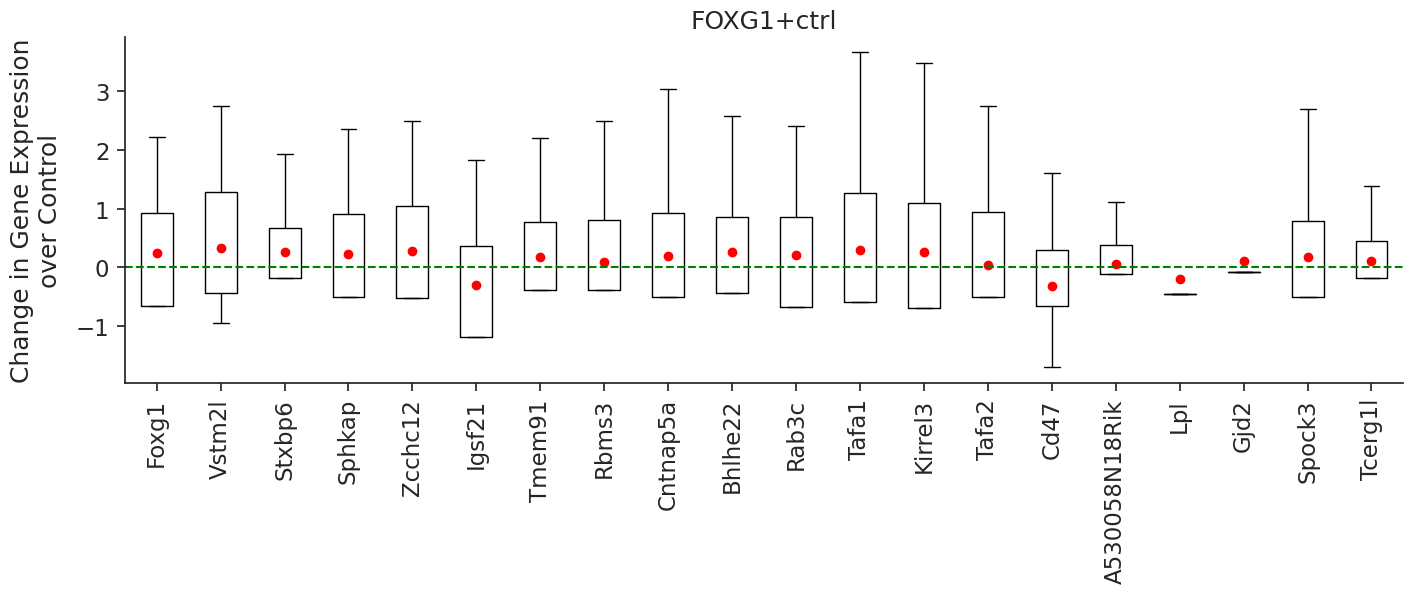

In [4]:
gears_model.plot_perturbation('FOXG1+ctrl')

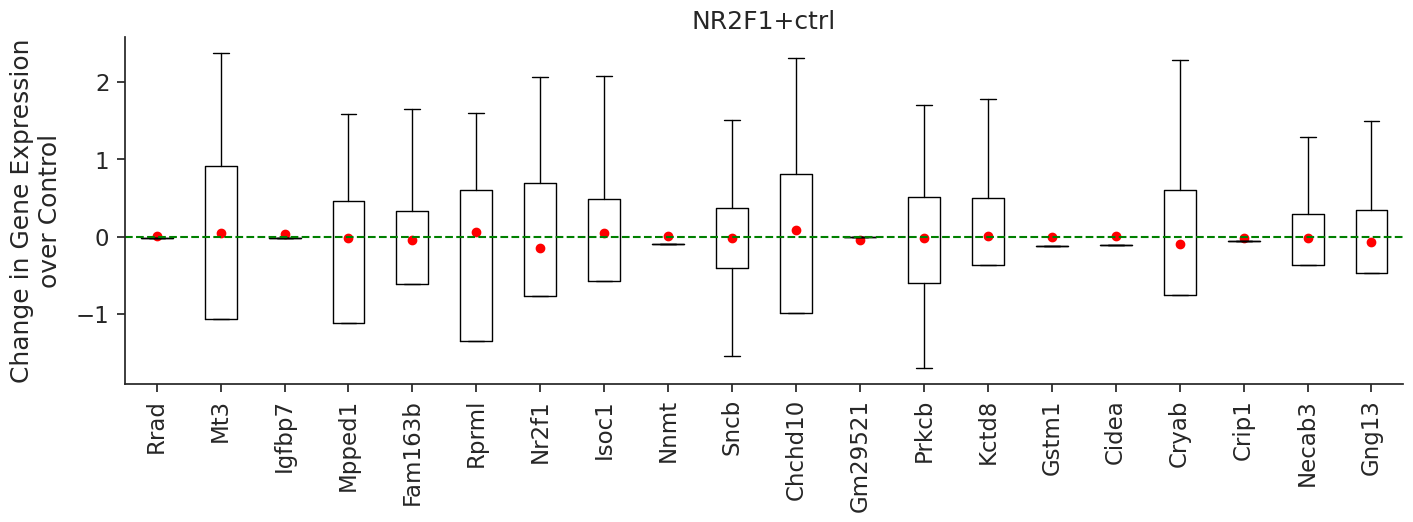

In [5]:
gears_model.plot_perturbation('NR2F1+ctrl')

In [24]:
gears_model.predict([['FEV'], ['FEV', 'AHR']])

{'FEV': array([-1.6480488e-13,  1.9913395e-03,  2.9681461e-02, ...,
         3.2692113e+00,  4.6557155e-02,  9.8494476e-13], dtype=float32),
 'FEV_AHR': array([-1.8563952e-13,  1.8748159e-02,  1.7998973e-02, ...,
         3.2648251e+00,  7.7018358e-02,  1.2283851e-12], dtype=float32)}

Gene list can be found here:

In [25]:
gears_model.gene_list[:5]

['RP11-34P13.8', 'RP11-54O7.3', 'SAMD11', 'PERM1', 'HES4']